In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# 지표 데이터 가져오기
stock_data = pd.read_excel('./data/index_Infomation_v0.1.xlsx')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data

,Date,nasdaq_Close,snp500_Close,DJI_Close,KOSPI_Close,samsung_PER,samsung_PBR,samsung_ROE,apple_PER,apple_PBR,...,중앙은행 기준금리,생산자물가지수,수입물가지수,소비자물가지수,수입,수출,경상수지,소비자심리지수,기업경기실사지수,foreign_exchange_reserves
0,2014-11-01,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
1,2014-11-02,4630.74023,2018.05004,17390.5195,1964.43,6.29,1.47,0.233704,3.794397,5.922144,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
2,2014-11-03,4638.91015,2017.81005,17366.2402,1952.97,6.24,1.45,0.232372,3.843583,5.998912,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
3,2014-11-04,4623.64013,2012.09997,17383.8398,1935.19,6.15,1.43,0.232520,3.815476,5.955043,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
4,2014-11-05,4620.72021,2023.56994,17484.5292,1931.43,6.08,1.42,0.233553,3.824611,5.969301,...,2.0,100.12,113.7,94.015,105.99,107.37,10582.7,103.3,71,"3,631"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2024-06-26,17805.16010,5477.89990,39127.8007,2792.05,38.15,1.56,0.040891,33.713045,52.617977,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3526,2024-06-27,17858.67960,5482.87011,39164.0585,2784.06,38.29,1.57,0.041003,33.847424,52.827711,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3527,2024-06-28,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"
3528,2024-06-29,17732.59960,5460.47998,39118.8593,2797.82,38.24,1.57,0.041056,33.297263,51.969042,...,1.5,115.10,148.6,106.830,155.99,139.04,567.1,104.3,86,"4,122"


In [8]:
# 삼성 주식 데이터 가져오기
df = stock_data[['Date', 'samsung_Close', '미국 중앙은행 기준금리', '미국 국내총생산(GDP) 전분기 대비', 'dollar_to_won_Close']]
df

,Date,samsung_Close,미국 중앙은행 기준금리,미국 국내총생산(GDP) 전분기 대비,dollar_to_won_Close
0,2014-11-01,24880.0,0.09,17912.079,1053.80004
1,2014-11-02,24880.0,0.09,17912.079,1053.80004
2,2014-11-03,24700.0,0.09,17912.079,1051.19995
3,2014-11-04,24340.0,0.09,17912.079,1081.59997
4,2014-11-05,24040.0,0.09,17912.079,1076.90002
...,...,...,...,...,...
3525,2024-06-26,81300.0,5.33,28629.153,1390.89001
3526,2024-06-27,81600.0,5.33,28629.153,1393.38000
3527,2024-06-28,81500.0,5.33,28629.153,1386.94995
3528,2024-06-29,81500.0,5.33,28629.153,1386.94995


In [24]:
df['US_GDP_KRW'] = round(df['미국 국내총생산(GDP) 전분기 대비'] * df['dollar_to_won_Close'])
df

C:\Users\4호실-3\AppData\Local\Temp\ipykernel_5816\2126781118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US_GDP_KRW'] = round(df['미국 국내총생산(GDP) 전분기 대비'] * df['dollar_to_won_Close'])


,Date,samsung_Close,미국 중앙은행 기준금리,미국 국내총생산(GDP) 전분기 대비,dollar_to_won_Close,US_GDP_KRW
0,2014-11-01,24880.0,0.09,17912.079,1053.80004,18875750.0
1,2014-11-02,24880.0,0.09,17912.079,1053.80004,18875750.0
2,2014-11-03,24700.0,0.09,17912.079,1051.19995,18829177.0
3,2014-11-04,24340.0,0.09,17912.079,1081.59997,19373704.0
4,2014-11-05,24040.0,0.09,17912.079,1076.90002,19289518.0
...,...,...,...,...,...,...
3525,2024-06-26,81300.0,5.33,28629.153,1390.89001,39820003.0
3526,2024-06-27,81600.0,5.33,28629.153,1393.38000,39891289.0
3527,2024-06-28,81500.0,5.33,28629.153,1386.94995,39707202.0
3528,2024-06-29,81500.0,5.33,28629.153,1386.94995,39707202.0


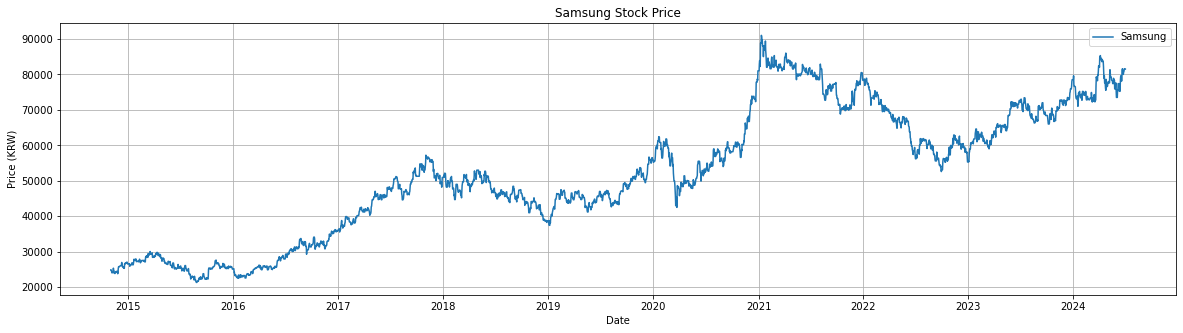

In [5]:
# 삼성 주식 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['samsung_Close'], label='Samsung')

plt.title('Samsung Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

plt.show()


In [10]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

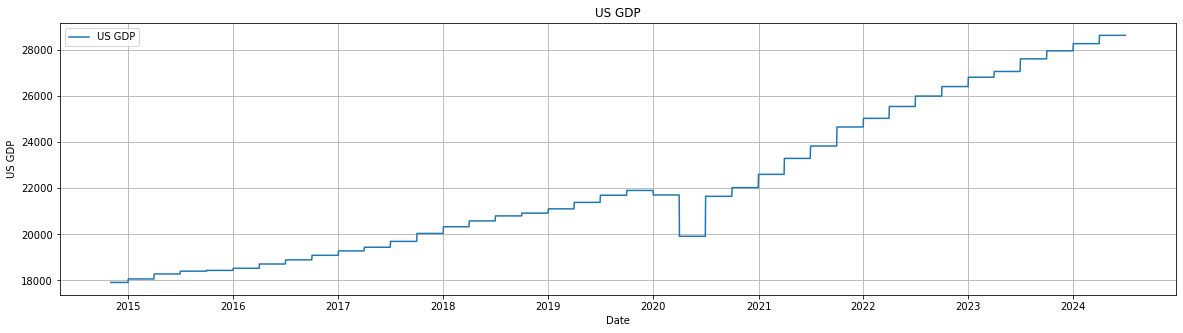

In [19]:
# 미 GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['미국 국내총생산(GDP) 전분기 대비'], label='US GDP')

plt.title('US GDP')
plt.xlabel('Date')
plt.ylabel('US GDP ($)')
plt.legend()
plt.grid(True)

plt.show()

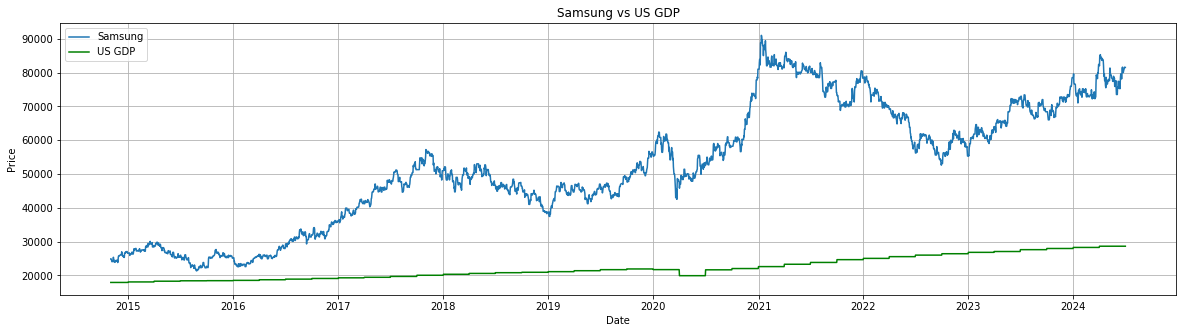

In [21]:
# 삼성 vs 미GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['samsung_Close'], label='Samsung')
plt.plot(df['Date'], df['미국 국내총생산(GDP) 전분기 대비'], label='US GDP', color='green')

plt.title('Samsung vs US GDP')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

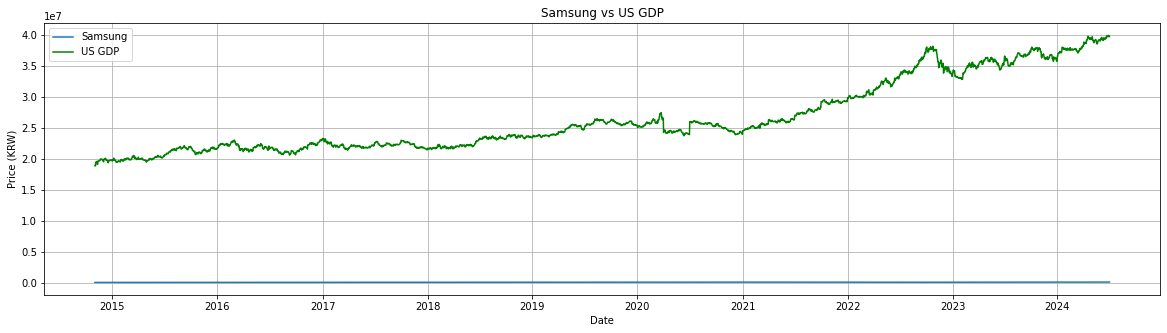

In [26]:
# 삼성 vs 미GDP 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['samsung_Close'], label='Samsung')
plt.plot(df['Date'], df['US_GDP_KRW'], label='US GDP', color='green')

plt.title('Samsung vs US GDP')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
samsung_normal_df = normalize(df, 'samsung_Close')
USGDP_normalize = normalize(df, 'US_GDP_KRW')

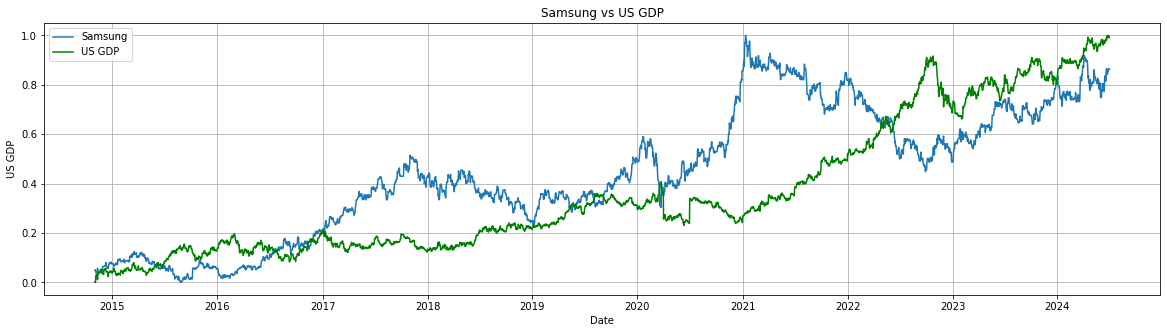

In [29]:
# 정규화 적용 삼성주식과 미GDP 그래프
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], samsung_normal_df, label='Samsung')
plt.plot(df['Date'], USGDP_normalize, label='US GDP', color='green')

plt.title('Samsung vs US GDP')
plt.xlabel('Date')
plt.ylabel('US GDP')
plt.legend()
plt.grid(True)

plt.show()

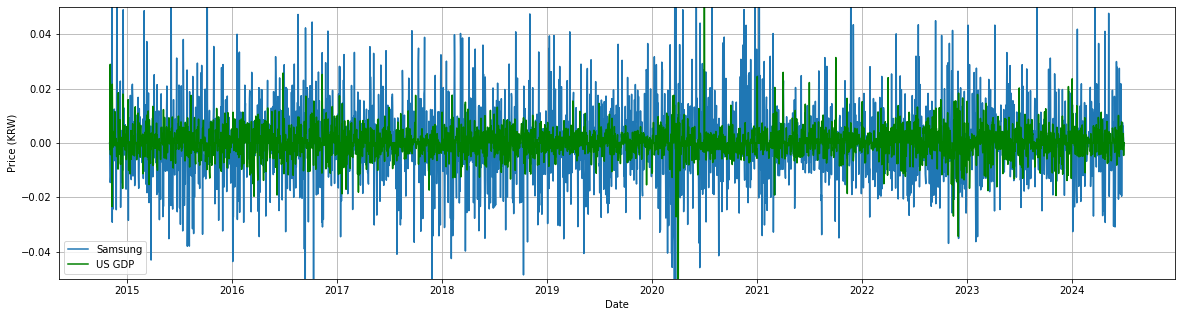

In [41]:
# 변동율 차이 비교
daily_change_USGDP = df['US_GDP_KRW'].pct_change()

#그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], daily_change_samsung, label='Samsung')
plt.plot(df['Date'], daily_change_USGDP, label='US GDP', color='green')
plt.ylim(-0.05, 0.05)

plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


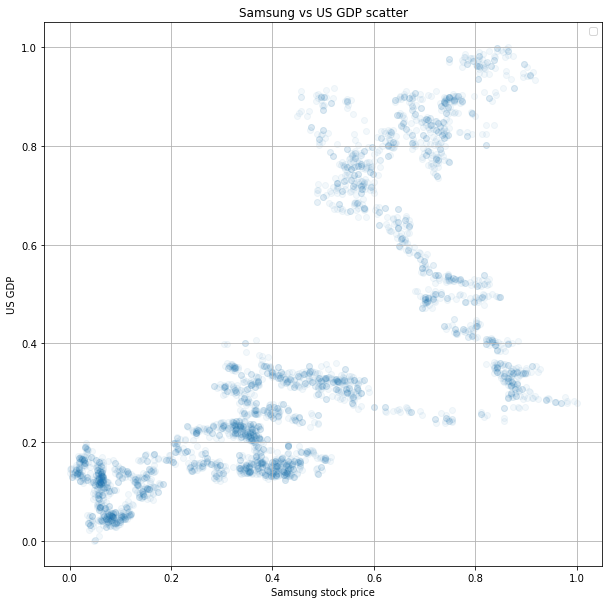

In [44]:
# 정규화 데이터로 산점도 그래프
plt.figure(figsize=(10,10))
plt.scatter(samsung_normal_df, USGDP_normalize, alpha=0.05)

plt.title('Samsung vs US GDP scatter')
plt.xlabel('Samsung stock price')
plt.ylabel('US GDP')
plt.legend()
plt.grid(True)

plt.show()

In [33]:
# Calculate the correlation
correlation = df['US_GDP_KRW'].corr(df['samsung_Close'])
print(f"Correlation between Gold Price and Apple Stock Price: {correlation:.2f}")

Correlation between Gold Price and Apple Stock Price: 0.71
